In [4]:
! pip install -r requirements2.txt

In [6]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

you have prevelance, hospitalization and ED visits. for each you want:
1. line plot of year vs rate
2. bar plot of geo id vs rate. you want to sort it from greatest to least
3. bar plot of borough vs rate. you want to sort it from greatest to least


In [3]:
hosp_data=pd.read_csv('MERGED_asthmaMOQ_hospitalizations_uhf42.csv')
hosp_data.head()

#important columns are:

#asthma_hosp_adult_estimated__rate_per10k
#asthma_hosp_0_4_estimated_annual_rate_per_10000
#asthma_hosp_5_14_estimated_annual_rate_per_10000


,Unnamed: 0,year,geo_type_name,borough,geography,geography_id,asthma_hosp_5_14_estimated_annual_rate_per_10000,asthma_hosp_5_14_number,asthma_hosp_0_4_estimated_annual_rate_per_10000,asthma_hosp_0_4_number,asthma_hosp_adult_estimated__age_adjusted_rate_per10k,asthma_hosp_adult_estimated__rate_per10k,asthma_hosp_adult_number
0,0,2005,neighborhood (uhf 42),queens,bayside - little neck,404,13.1,16.0,23.5,10.0,5.3,5.9,41.0
1,1,2006,neighborhood (uhf 42),queens,bayside - little neck,404,14.0,17.0,43.4,18.0,6.2,7.2,50.0
2,2,2007,neighborhood (uhf 42),queens,bayside - little neck,404,11.5,14.0,48.3,20.0,6.4,7.3,51.0
3,3,2008,neighborhood (uhf 42),queens,bayside - little neck,404,8.1,10.0,60.6,25.0,5.8,7.1,50.0
4,4,2009,neighborhood (uhf 42),queens,bayside - little neck,404,11.9,15.0,46.6,19.0,8.4,10.0,71.0


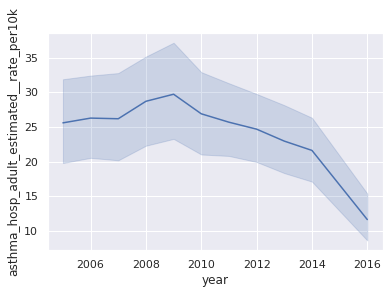

In [16]:
hosp_adult = sns.lineplot(data=hosp_data,x="year",y="asthma_hosp_adult_estimated__rate_per10k")

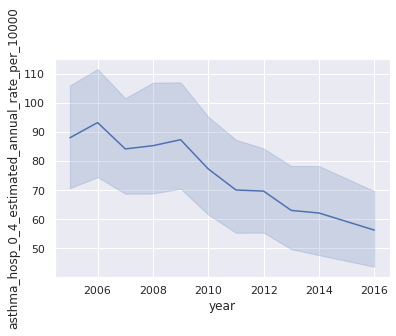

In [17]:
hosp_0_4 = sns.lineplot(data=hosp_data,x="year",y="asthma_hosp_0_4_estimated_annual_rate_per_10000")

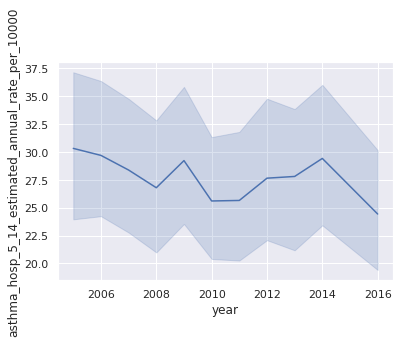

In [18]:
hosp_5_14 = sns.lineplot(data=hosp_data,x="year",y="asthma_hosp_5_14_estimated_annual_rate_per_10000")

<AxesSubplot:xlabel='geography_id'>

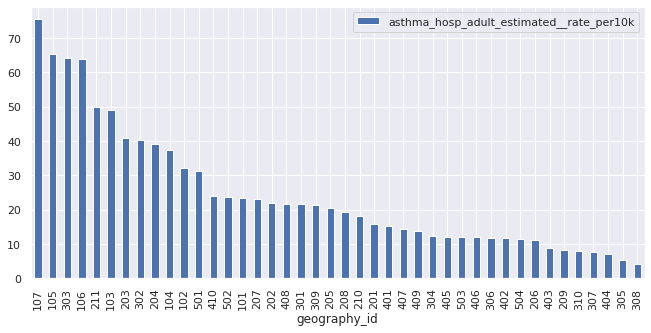

In [31]:
hosp_data.groupby(["geography_id"]).mean().reset_index().sort_values(by="asthma_hosp_adult_estimated__rate_per10k", ascending=False).plot.bar(x="geography_id", y="asthma_hosp_adult_estimated__rate_per10k",figsize=(11,5))




<AxesSubplot:xlabel='geography_id'>

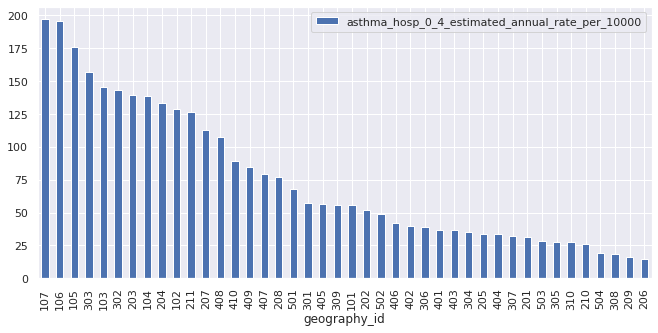

In [32]:
hosp_data.groupby(["geography_id"]).mean().reset_index().sort_values(by="asthma_hosp_0_4_estimated_annual_rate_per_10000", ascending=False).plot.bar(x="geography_id", y="asthma_hosp_0_4_estimated_annual_rate_per_10000",figsize=(11,5))


<AxesSubplot:xlabel='geography_id'>

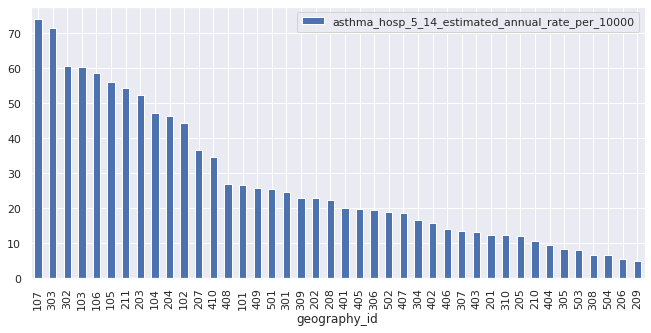

In [33]:
hosp_data.groupby(["geography_id"]).mean().reset_index().sort_values(by="asthma_hosp_5_14_estimated_annual_rate_per_10000", ascending=False).plot.bar(x="geography_id", y="asthma_hosp_5_14_estimated_annual_rate_per_10000",figsize=(11,5))


<AxesSubplot:xlabel='borough'>

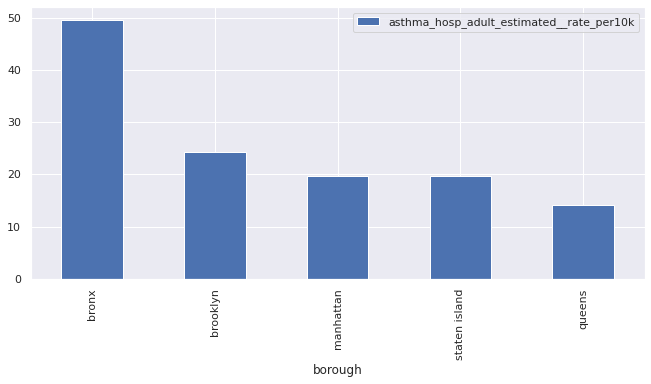

In [34]:
hosp_data.groupby(["borough"]).mean().reset_index().sort_values(by="asthma_hosp_adult_estimated__rate_per10k", ascending=False).plot.bar(x="borough", y="asthma_hosp_adult_estimated__rate_per10k",figsize=(11,5))




<AxesSubplot:xlabel='borough'>

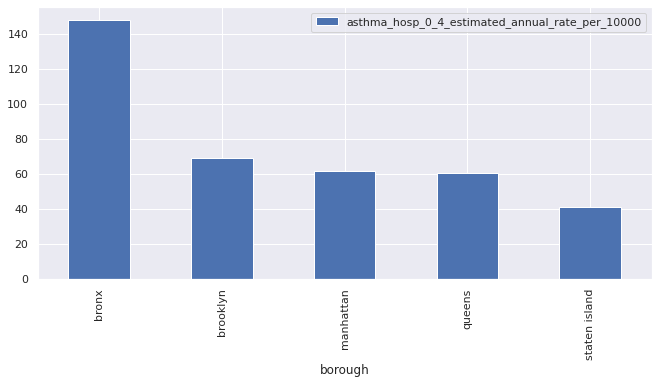

In [35]:
hosp_data.groupby(["borough"]).mean().reset_index().sort_values(by="asthma_hosp_0_4_estimated_annual_rate_per_10000", ascending=False).plot.bar(x="borough", y="asthma_hosp_0_4_estimated_annual_rate_per_10000",figsize=(11,5))



<AxesSubplot:xlabel='borough'>

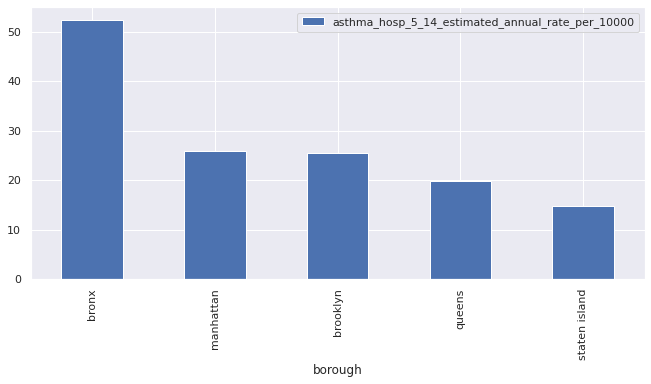

In [37]:
hosp_data.groupby(["borough"]).mean().reset_index().sort_values(by="asthma_hosp_5_14_estimated_annual_rate_per_10000", ascending=False).plot.bar(x="borough", y="asthma_hosp_5_14_estimated_annual_rate_per_10000",figsize=(11,5))


In [43]:
ed_data=pd.read_csv('MERGED_asthmaCDF_ED_uhf42.csv')
ed_data.head()

#important columns are:

#ed_annual_adult_rate_per10k
#ed_annual_0_4_rate_per10k
#ed_annual_5_17_rate_per10k

,Unnamed: 0,year,geo_type_name,borough,geography,geography_id,ed_annual_adult_estimated_age_adjusted_rate_per10k,ed_annual_adult_rate_per10k,ed_annual_adult_number,ed_annual_0_4_rate_per10k,ed_annual_0_4_number,ed_annual_5_17_rate_per10k,ed_annual_5_17_number
0,0,2005,neighborhood (uhf 42),queens,bayside - little neck,404,16.3,15.2,106.0,101.2,43.0,31.1,38.0
1,1,2006,neighborhood (uhf 42),queens,bayside - little neck,404,17.4,17.9,125.0,91.6,38.0,42.7,52.0
2,2,2007,neighborhood (uhf 42),queens,bayside - little neck,404,18.7,18.1,127.0,111.2,46.0,49.2,60.0
3,3,2008,neighborhood (uhf 42),queens,bayside - little neck,404,17.1,17.3,122.0,133.2,55.0,51.7,64.0
4,4,2009,neighborhood (uhf 42),queens,bayside - little neck,404,23.2,23.3,166.0,125.2,51.0,49.1,62.0


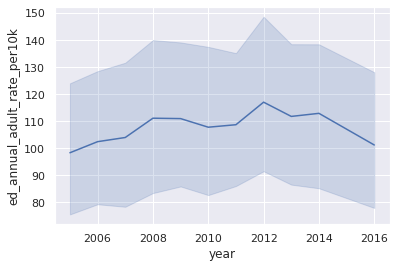

In [44]:
ed_adult = sns.lineplot(data=ed_data,x="year",y="ed_annual_adult_rate_per10k")

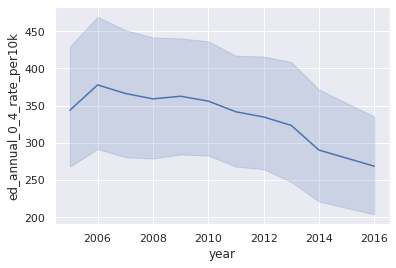

In [45]:
ed_0_4 = sns.lineplot(data=ed_data,x="year",y="ed_annual_0_4_rate_per10k")

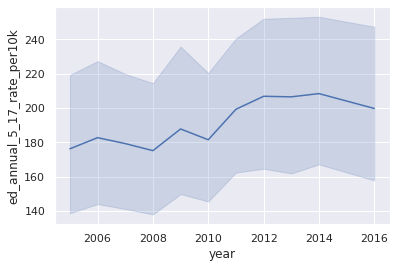

In [46]:
ed_5_17= sns.lineplot(data=ed_data,x="year",y="ed_annual_5_17_rate_per10k")

<AxesSubplot:xlabel='borough'>

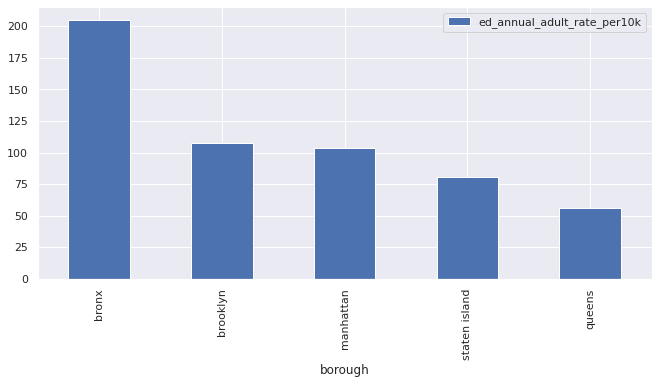

In [48]:
ed_data.groupby(["borough"]).mean().reset_index().sort_values(by="ed_annual_adult_rate_per10k", ascending=False).plot.bar(x="borough", y="ed_annual_adult_rate_per10k",figsize=(11,5))



<AxesSubplot:xlabel='borough'>

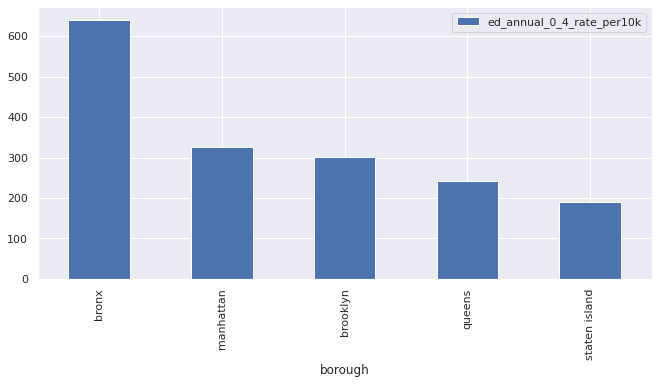

In [49]:
ed_data.groupby(["borough"]).mean().reset_index().sort_values(by="ed_annual_0_4_rate_per10k", ascending=False).plot.bar(x="borough", y="ed_annual_0_4_rate_per10k",figsize=(11,5))

<AxesSubplot:xlabel='borough'>

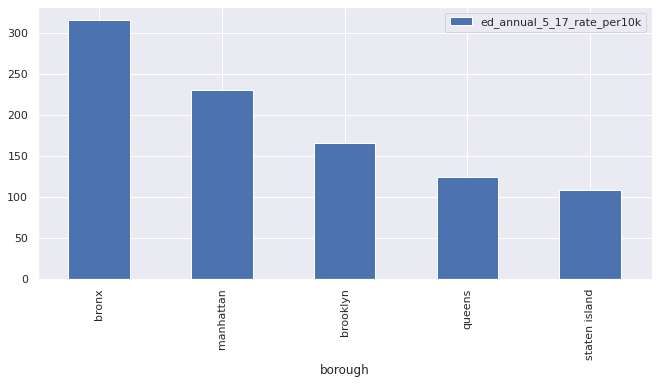

In [51]:
ed_data.groupby(["borough"]).mean().reset_index().sort_values(by="ed_annual_5_17_rate_per10k", ascending=False).plot.bar(x="borough", y="ed_annual_5_17_rate_per10k",figsize=(11,5))

In [ ]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="OpenStreetMap")
folium_map

In [ ]:
my_zip = zip(Q_clean['geography_id'], Q_clean['asthma_hosp_adult_estimated__rate_per10k'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

# EDA RESTARTS HERE







In [7]:
ed_adult=pd.read_ csv('C_clean.csv')
ed_adult.head()

,Unnamed: 0,year,geo_type_name,borough,geography,geography_id,ed_annual_adult_estimated_age_adjusted_rate_per10k,ed_annual_adult_rate_per10k,ed_annual_adult_number
0,0,2005,citywide,new york city,new york city,1,99.5,100.3,62425.0
1,1,2006,citywide,new york city,new york city,1,102.7,103.5,64534.0
2,2,2007,citywide,new york city,new york city,1,104.4,105.0,65905.0
3,3,2008,citywide,new york city,new york city,1,108.5,109.0,69081.0
4,4,2009,citywide,new york city,new york city,1,108.7,109.1,69944.0


<AxesSubplot:xlabel='geography'>

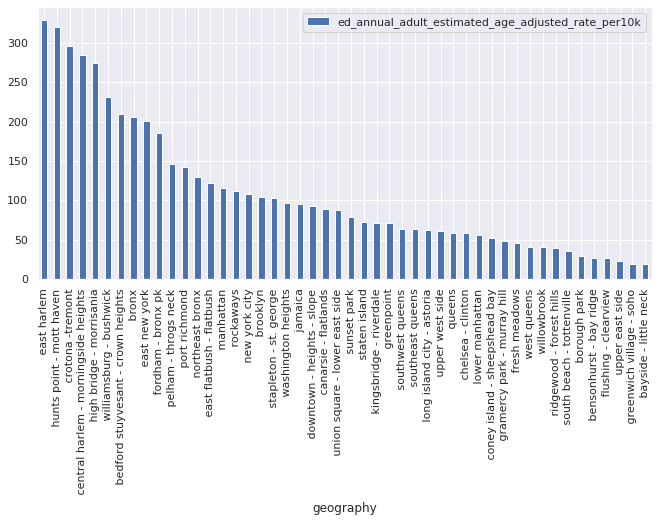

In [11]:
ed_adult.groupby(["geography"]).mean().reset_index().sort_values(by="ed_annual_adult_estimated_age_adjusted_rate_per10k", ascending=False).plot.bar(x="geography", y="ed_annual_adult_estimated_age_adjusted_rate_per10k",figsize=(11,5))



In [12]:
hosp_adult=pd.read_csv('Q_clean.csv')
hosp_adult.head()

,Unnamed: 0,year,geo_type_name,borough,geography,geography_id,asthma_hosp_adult_estimated__age_adjusted_rate_per10k,asthma_hosp_adult_estimated__rate_per10k,asthma_hosp_adult_number
0,0,2005,citywide,new york city,new york city,1,26.7,26.5,16480.0
1,1,2006,citywide,new york city,new york city,1,27.2,27.1,16887.0
2,2,2007,citywide,new york city,new york city,1,27.3,27.1,17003.0
3,3,2008,citywide,new york city,new york city,1,28.6,28.5,18036.0
4,4,2009,citywide,new york city,new york city,1,29.6,29.5,18878.0


<AxesSubplot:xlabel='geography'>

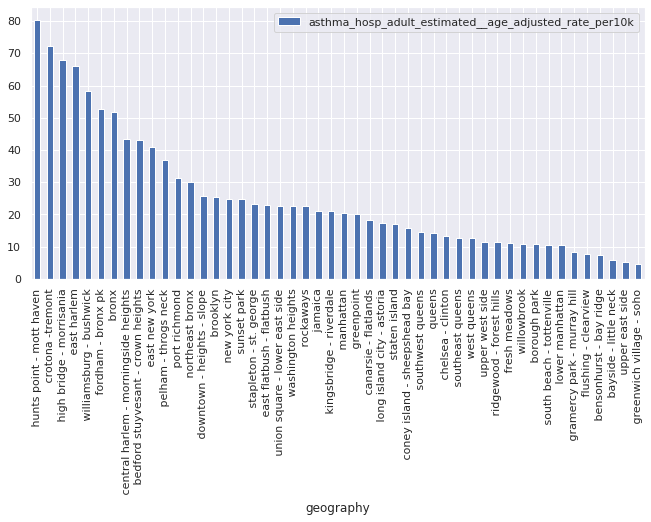

In [15]:
hosp_adult.groupby(["geography"]).mean().reset_index().sort_values(by="asthma_hosp_adult_estimated__age_adjusted_rate_per10k", ascending=False).plot.bar(x="geography", y="asthma_hosp_adult_estimated__age_adjusted_rate_per10k",figsize=(11,5))




In [16]:
prev_adult=pd.read_csv('H_clean.csv')
prev_adult.head()

,Unnamed: 0,year,geo_type_name,borough,geography,geography_id,adults_12mo_asthma_age_adjusted_percent,adults_12mo_asthma_number,adults_12mo_asthma_percent
0,0,2003,citywide,new york city,new york city,1,4.6,244000.0,4.6
1,1,2004,citywide,new york city,new york city,1,4.9,297000.0,4.9
2,2,2006,citywide,new york city,new york city,1,5.3,318000.0,5.3
3,3,2007,citywide,new york city,new york city,1,4.4,266000.0,4.4
4,4,2008,citywide,new york city,new york city,1,5.3,322000.0,5.3


<AxesSubplot:xlabel='geography'>

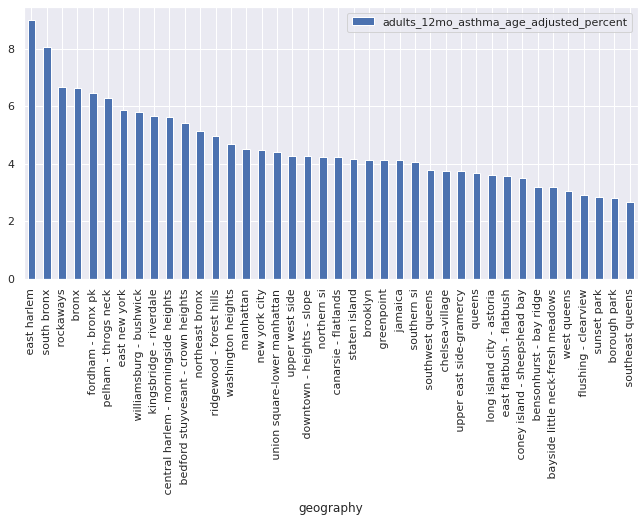

In [17]:
prev_adult.groupby(["geography"]).mean().reset_index().sort_values(by="adults_12mo_asthma_age_adjusted_percent", ascending=False).plot.bar(x="geography", y="adults_12mo_asthma_age_adjusted_percent",figsize=(11,5))



